In [494]:

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import scipy
from sklearn.neighbors import KernelDensity
from scipy.optimize import curve_fit
import pprint
from scipy.stats import gamma, norm, loglaplace
import math
from scipy import stats

In [495]:
data = pd.read_csv('transactions.csv')
data

,isFraud,TransactionDT,TransactionAmt,D1,D2,D3,card1,card2,card3,addr1,addr2,V104,V105,V106
0,0,86506,50.000,0.0,NaN,NaN,4497,514.0,150.0,420.0,87.0,0.0,0.0,0.0
1,0,86761,39.000,0.0,NaN,NaN,7875,314.0,150.0,299.0,87.0,0.0,0.0,0.0
2,0,86821,73.950,66.0,66.0,35.0,10112,360.0,150.0,264.0,87.0,0.0,0.0,0.0
3,0,87135,107.950,245.0,245.0,245.0,17359,555.0,150.0,469.0,87.0,0.0,0.0,0.0
4,0,87557,35.950,0.0,NaN,NaN,9785,343.0,150.0,485.0,87.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59049,0,15810350,92.000,3.0,3.0,4.0,2377,203.0,150.0,110.0,87.0,0.0,0.0,0.0
59050,0,15810372,117.000,472.0,471.0,6.0,12873,535.0,150.0,299.0,87.0,0.0,0.0,0.0
59051,0,15810912,73.838,0.0,NaN,NaN,5096,555.0,185.0,NaN,NaN,0.0,0.0,0.0
59052,0,15811007,204.970,315.0,315.0,315.0,12037,595.0,150.0,231.0,87.0,0.0,0.0,0.0


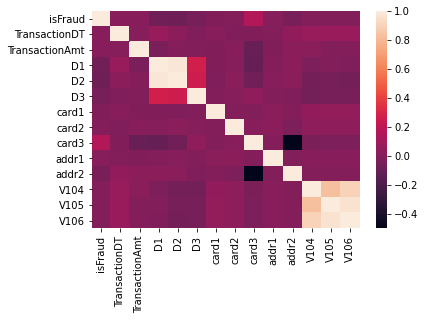

In [496]:
sns.heatmap(data.corr())
plt.show()

### Choose subsample with main variables for your further analysis.


In [497]:
columns = ['TransactionAmt',  'D1', 'card1']
subsample = data[columns]
print(subsample)

       TransactionAmt     D1  card1
0              50.000    0.0   4497
1              39.000    0.0   7875
2              73.950   66.0  10112
3             107.950  245.0  17359
4              35.950    0.0   9785
...               ...    ...    ...
59049          92.000    3.0   2377
59050         117.000  472.0  12873
59051          73.838    0.0   5096
59052         204.970  315.0  12037
59053         279.950    0.0  15066

[59054 rows x 3 columns]


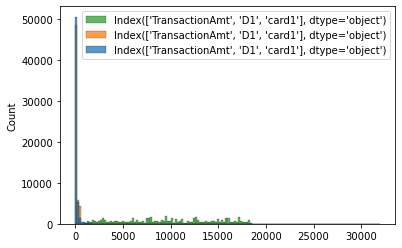

In [498]:
sns.histplot(subsample, label=subsample.columns)
plt.legend()
plt.show()


### restrict data up to 90 percentile

In [499]:
percentile = 0.90
subsample = subsample[
      (subsample['TransactionAmt'] < subsample['TransactionAmt'].quantile(percentile))&
      (subsample['D1'] < subsample['D1'].quantile(percentile))&
      (subsample['card1'] < subsample['card1'].quantile(percentile))
]
print(subsample)

       TransactionAmt     D1  card1
0              50.000    0.0   4497
1              39.000    0.0   7875
2              73.950   66.0  10112
4              35.950    0.0   9785
5             250.000  238.0   3278
...               ...    ...    ...
59047          24.422    0.0   6019
59048          49.000   16.0  12063
59049          92.000    3.0   2377
59051          73.838    0.0   5096
59052         204.970  315.0  12037

[42702 rows x 3 columns]


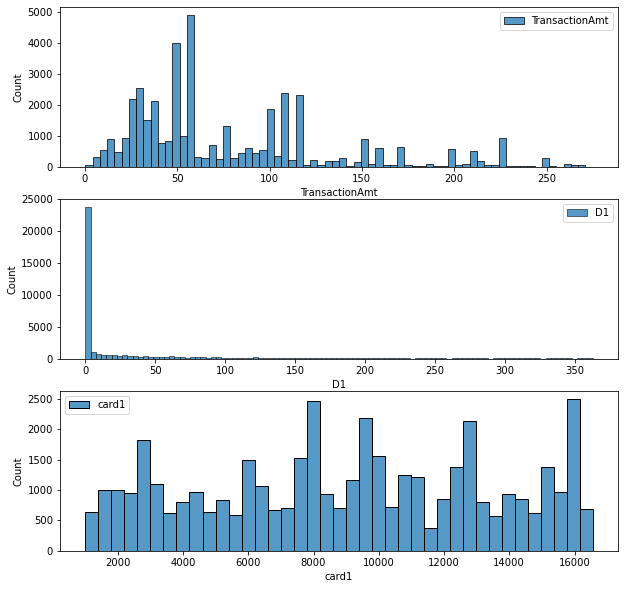

In [500]:
fig, axs = plt.subplots(3, figsize=(10, 10))
for idx, column in enumerate(subsample.columns):
    sns.histplot(subsample[column], label=column, ax=axs[idx])
    axs[idx].legend()
plt.show()

### Step 2. You need to make a non-parametric estimation of PDF in form of histogram and using kernel density function (or probability law in case of discrete RV).

/Users/nduginets/.conda/envs/newexorders/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/nduginets/.conda/envs/newexorders/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/nduginets/.conda/envs/newexorders/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot`

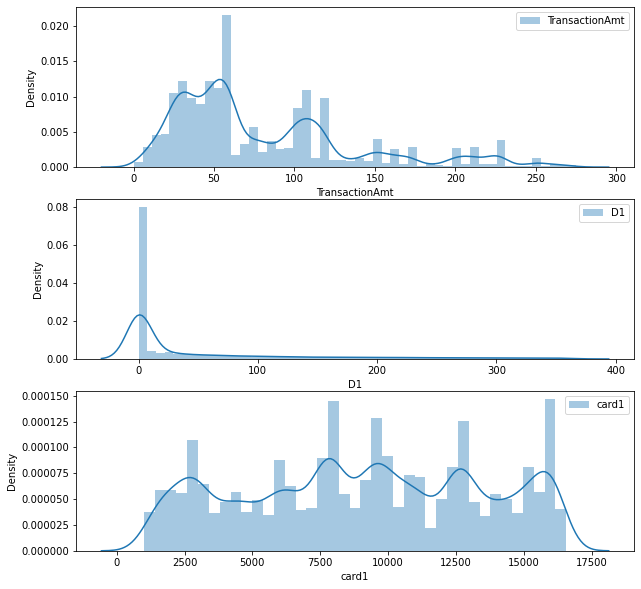

In [501]:
fig, axs = plt.subplots(3, figsize=(10, 10))
for idx, column in enumerate(subsample.columns):
    sns.distplot(subsample[column], kde=True, norm_hist=True, label=column, ax=axs[idx])
    axs[idx].legend()

plt.show()

/Users/nduginets/.conda/envs/newexorders/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/nduginets/.conda/envs/newexorders/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/nduginets/.conda/envs/newexorders/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will resu

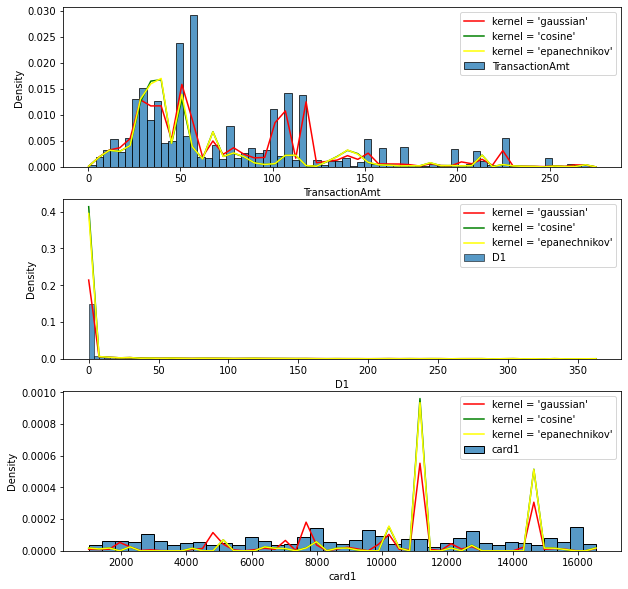

In [502]:
colors = ['red', 'green', 'yellow']
kernels = ['gaussian', 'cosine', 'epanechnikov']

fig, axes = plt.subplots(3, figsize=(10, 10))
for idx, column in enumerate(subsample.columns):
    data = subsample[column]
    y = np.array(data)
    X = np.reshape(y, (len(y), 1))
    X_plot = np.linspace(X.min(), X.max(), 50)
    X_plot=np.reshape(X_plot,(len(X_plot),1))
    sns.histplot(data, ax=axes[idx], stat='density', label=column)

    for color, kernel in zip(colors, kernels):
        kde = KernelDensity(kernel=kernel).fit(X)
        log_dens = kde.score_samples(X_plot)
        sns.lineplot(X_plot[:, 0], np.exp(log_dens), color=color,
                linestyle='-', label="kernel = '{0}'".format(kernel), ax=axes[idx])
    axes[idx].legend()
fig.show()

### Step 3. You need to make an estimation of order statistics and represent them as “box with whiskers” plot.

In [503]:
for idx, column in enumerate(subsample.columns):
    data = subsample[column]
    print("mean for {} is {}".format(column, data.mean()))
    print("variance for {} is {}".format(column, data.var()))
    print("median for {} is {}".format(column, data.median()))
    print("=" * 20)

mean for TransactionAmt is 80.34098969603298
variance for TransactionAmt is 3244.37346075922
median for TransactionAmt is 59.0
mean for D1 is 51.04550138166831
variance for D1 is 7696.132610262414
median for D1 is 0.0
mean for card1 is 9056.156643716922
variance for card1 is 19386887.0178031
median for card1 is 9227.0


/Users/nduginets/.conda/envs/newexorders/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/nduginets/.conda/envs/newexorders/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/nduginets/.conda/envs/newexorders/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an 

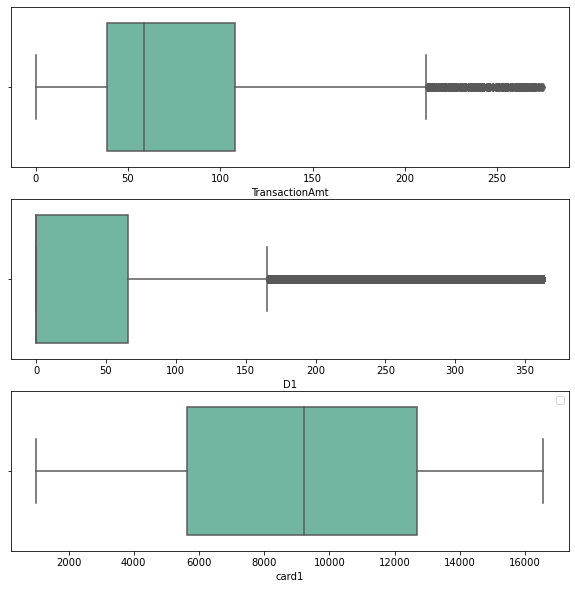

In [504]:
fig, axs = plt.subplots(3, figsize=(10, 10))
for idx, column in enumerate(subsample.columns):
    data = subsample[column]
    sns.boxplot(data, labels=[column], ax=axs[idx], palette="Set2")
plt.legend()
plt.show()

### Step 4. Find one or several theoretical distributions that could describe your sample on a basis of non-parametric analysis results


/Users/nduginets/.conda/envs/newexorders/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


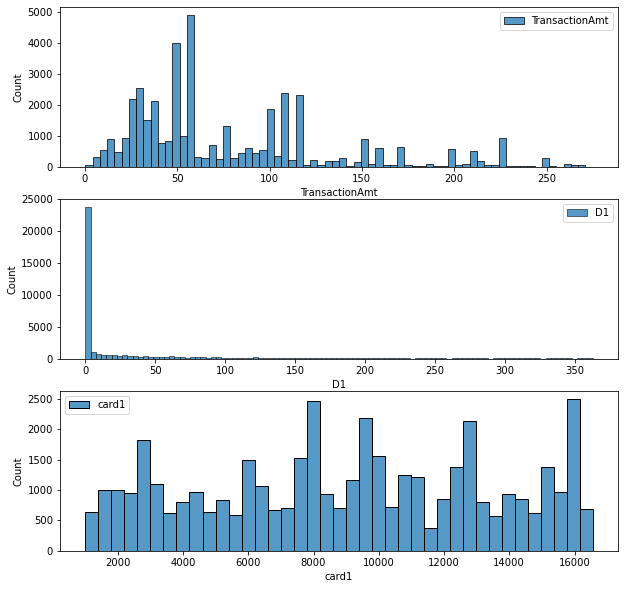

In [505]:
fig, axes = plt.subplots(3, figsize=(10, 10))
for idx, column in enumerate(subsample.columns):
    data = subsample[column]
    sns.histplot(data, ax=axes[idx], label=column)
    axes[idx].legend()
fig.show()

In [506]:
my_params = {
    'TransactionAmt': {'gamma': (2.09, 0.27, 38.13),
                       'loglaplace': (1.7, -0.15, 59.),
                       'norm': (80.34, 57)},
    'D1': {'gamma': (0.9, 0, 76.4),
           'loglaplace': (0.47, 0, 2.41),
           'norm': (51., 87.)},
    'card1': {'gamma': (1617., -168362., 109.66),
              'loglaplace': (2.011, -5.2, 9232.21),
              'norm': (9056.15, 4403.)}
}

mu_functions = {
    'gamma': gamma.pdf,
        'loglaplace': loglaplace.pdf,
        'norm': norm.pdf,
}

/Users/nduginets/.conda/envs/newexorders/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/nduginets/.conda/envs/newexorders/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/nduginets/.conda/envs/newexorders/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will resu

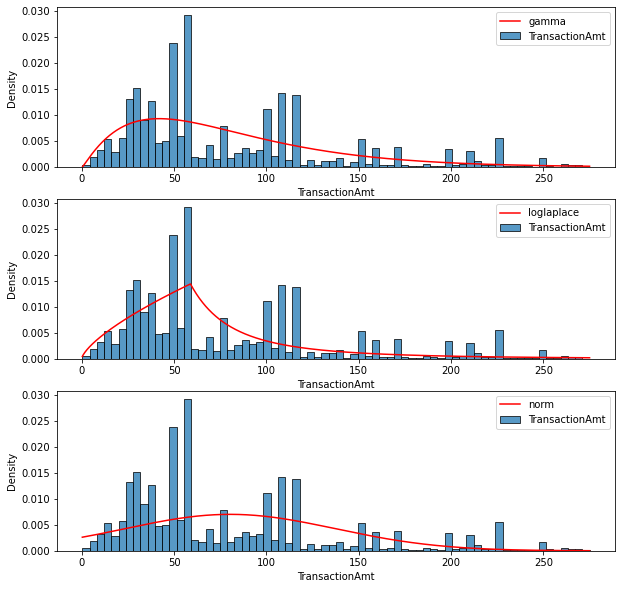

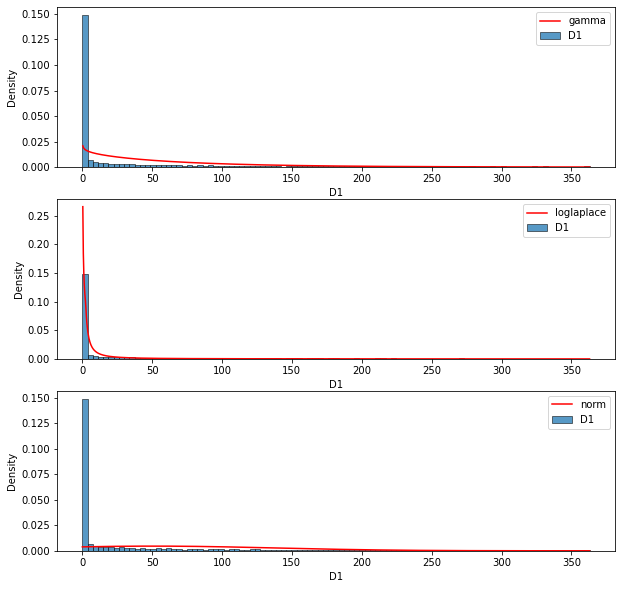

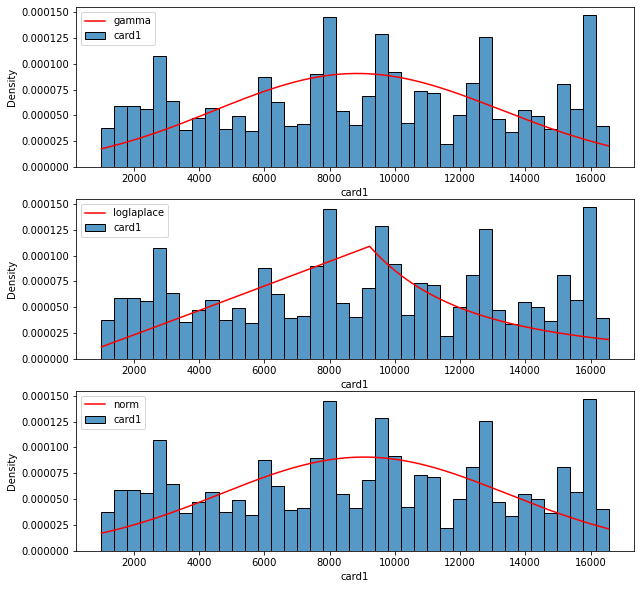

In [507]:
for column, func_args in my_params.items():
    fig, axes = plt.subplots(3, figsize=(10, 10))
    data = subsample[column]
    min_data, max_data = data.min(), data.max()

    for idx, (func_name, f_args) in enumerate(func_args.items()):
        sns.histplot(data, ax=axes[idx], stat='density', label=column)
        X = np.linspace(min_data, max_data, 1000)
        Y = mu_functions[func_name](X, *f_args)
        sns.lineplot(X, Y, ax=axes[idx], color="red", label=func_name)
        axes[idx].legend()

    fig.show()

### Step 5. Estimate parameters of chosen distributions using methods of maximum likelihood and least squares method.

just fit -- MLE
curve_fit -- lsm

#### MLE

In [508]:
params = {}
for i in subsample.columns:
    params[i] = {}

/Users/nduginets/.conda/envs/newexorders/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/nduginets/.conda/envs/newexorders/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/nduginets/.conda/envs/newexorders/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will resu

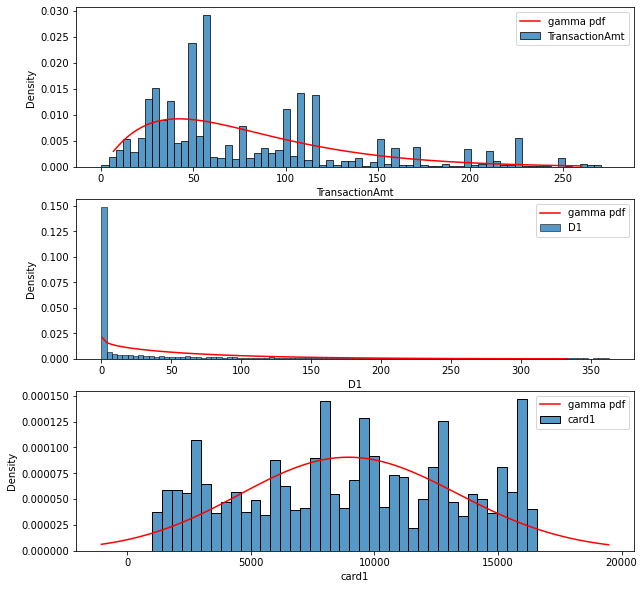

In [509]:
fig, axes = plt.subplots(3, figsize=(10, 10))
for idx, column in enumerate(subsample.columns):
    data = subsample[column]
    sns.histplot(data, ax=axes[idx], stat='density', label=column)
    a, floc, scale = gamma.fit(data)
    params[column]['gamma'] = (a,floc, scale)
    x = np.linspace(gamma.ppf(0.01, a, floc, scale), gamma.ppf(0.99, a, floc, scale), 100)
    sns.lineplot(x, gamma.pdf(x, a, floc, scale), label='gamma pdf', ax=axes[idx], color="red")

    axes[idx].legend()
fig.show()

/Users/nduginets/.conda/envs/newexorders/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/nduginets/.conda/envs/newexorders/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/nduginets/.conda/envs/newexorders/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will resu

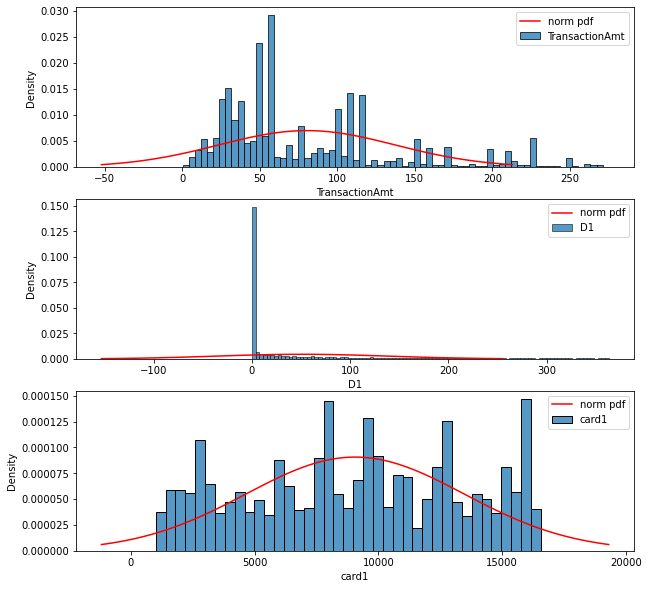

In [510]:
fig, axes = plt.subplots(3, figsize=(10, 10))
for idx, column in enumerate(subsample.columns):
    data = subsample[column]
    sns.histplot(data, ax=axes[idx], stat='density', label=column)
    loc, scale = norm.fit(data)
    params[column]['norm'] = (loc, scale)
    x = np.linspace(norm.ppf(0.01, loc, scale), norm.ppf(0.99, loc, scale), 100)
    sns.lineplot(x, norm.pdf(x, loc, scale), label='norm pdf', ax=axes[idx], color="red")

    axes[idx].legend()
fig.show()


/Users/nduginets/.conda/envs/newexorders/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:5003: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/Users/nduginets/.conda/envs/newexorders/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2494: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/Users/nduginets/.conda/envs/newexorders/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/nduginets/.conda/envs/newexorders/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:5003: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/Users/nduginets/.conda/envs/newexorders/lib/python3.7/sit

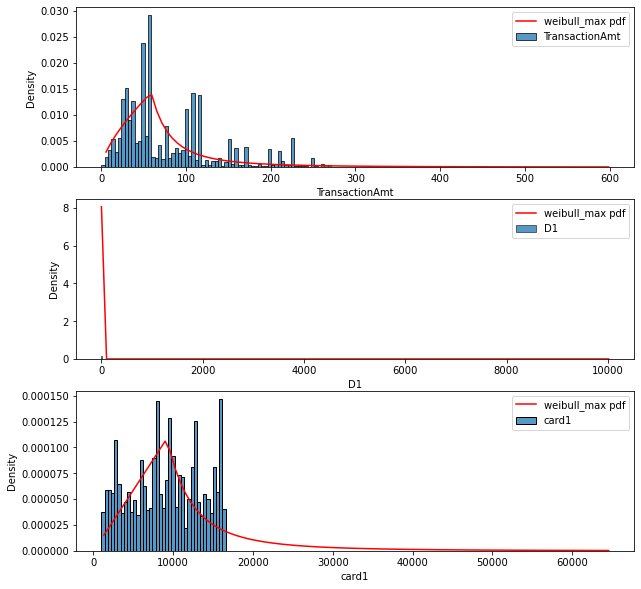

In [511]:
fig, axes = plt.subplots(3, figsize=(10, 10))
for idx, column in enumerate(subsample.columns):
    data = subsample[column]
    sns.histplot(data, ax=axes[idx], stat='density', label=column)
    a,b,c = loglaplace.fit(data)
    params[column]['loglaplace'] = (a, b, c)
    x = np.linspace(loglaplace.ppf(0.01, a,b,c), loglaplace.ppf(0.99, a,b,c), 100)
    sns.lineplot(x, loglaplace.pdf(x, a,b,c), label='weibull_max pdf', ax=axes[idx], color="red")

    axes[idx].legend()

fig.show()

#### LSM

In [512]:
pprint.pprint(params)

{'D1': {'gamma': (0.892302223060998, -5.452000738155459e-28, 76.40692662133263),
        'loglaplace': (0.4696107853943583,
                       -1.0907035209789414e-26,
                       2.4149609902949756),
        'norm': (51.04550138166831, 87.72657739480313)},
 'TransactionAmt': {'gamma': (2.099941018906274,
                              0.2706101990816906,
                              38.12982167444982),
                    'loglaplace': (1.6899056786036244,
                                   -0.16314822586313682,
                                   59.163147971617),
                    'norm': (80.34098969603298, 56.95873491989404)},
 'card1': {'gamma': (1617.8510642784113,
                     -168362.97202864266,
                     109.66331861683193),
           'loglaplace': (2.011273220795836,
                          -5.215808048777539,
                          9232.215795465236),
           'norm': (9056.156643716922, 4403.002726959278)}}


/Users/nduginets/.conda/envs/newexorders/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/nduginets/.conda/envs/newexorders/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/nduginets/.conda/envs/newexorders/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will resu

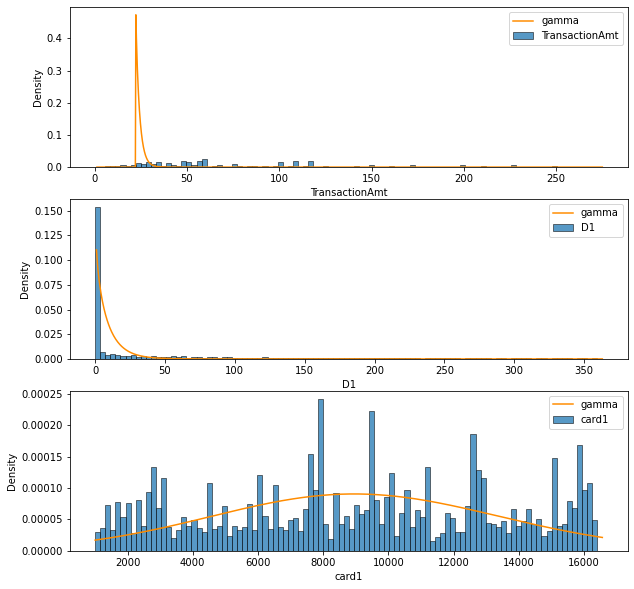

In [513]:
def func(x, a, b, c):
    return gamma.pdf(x, a, b, c)

NAME='gamma'

fig, axes = plt.subplots(3, figsize=(10, 10))
for idx, column in enumerate(subsample.columns):
    data = subsample[column]
    min_value, max_value = data.min(), data.max()
    date_entries, bins = np.histogram(data, bins=100)
    bins = bins[:100]
    sns.histplot(data, ax=axes[idx], stat='density', label=column, bins=bins)
    res = curve_fit(func, xdata=bins, ydata=date_entries, p0=[params[column][NAME]])
    xspace = np.linspace(min_value + 1, max_value, 1000)
    sns.lineplot(xspace, func(xspace, *res[0]), color='darkorange', ax=axes[idx], label=NAME)

    axes[idx].legend()

fig.show()

[5.79784999e+01 8.57894678e-05]
[1.01475910e-05 9.91393353e-06]
[9079.87783194  991.4235573 ]


/Users/nduginets/.conda/envs/newexorders/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/nduginets/.conda/envs/newexorders/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/nduginets/.conda/envs/newexorders/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will resu

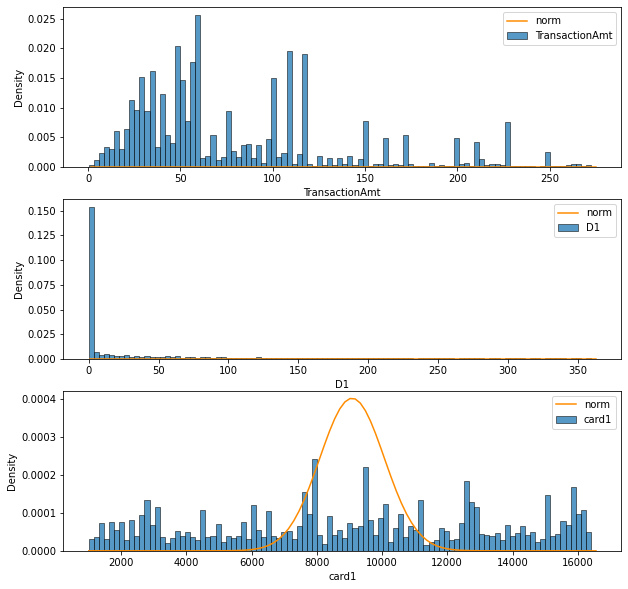

In [514]:
def func(x, a, b):
    return norm.pdf(x, a, b)

NAME='norm'

fig, axes = plt.subplots(3, figsize=(10, 10))
for idx, column in enumerate(subsample.columns):
    data = subsample[column]
    min_value, max_value = data.min(), data.max()
    date_entries, bins = np.histogram(data, bins=100)
    bins = bins[:100]
    sns.histplot(data, ax=axes[idx], stat='density', label=column, bins=bins)
    res = curve_fit(func, xdata=bins, ydata=date_entries, p0=[params[column][NAME]])
    print(res[0])
    xspace = np.linspace(min_value + 1, max_value, 100)
    sns.lineplot(xspace, func(xspace, *res[0]), color='darkorange', ax=axes[idx], label=NAME)

    axes[idx].legend()

fig.show()

[25.15837746  5.2645935  49.96689114]
[1.39802987e+00 2.83296439e-25 1.04005010e+01]
[   7.79892832 -380.67722818 6984.60940296]


/Users/nduginets/.conda/envs/newexorders/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/nduginets/.conda/envs/newexorders/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/nduginets/.conda/envs/newexorders/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/nduginets/.conda/envs/newexorders/lib/python3.7/site-packages/seaborn/_decorators.py:43: Futur

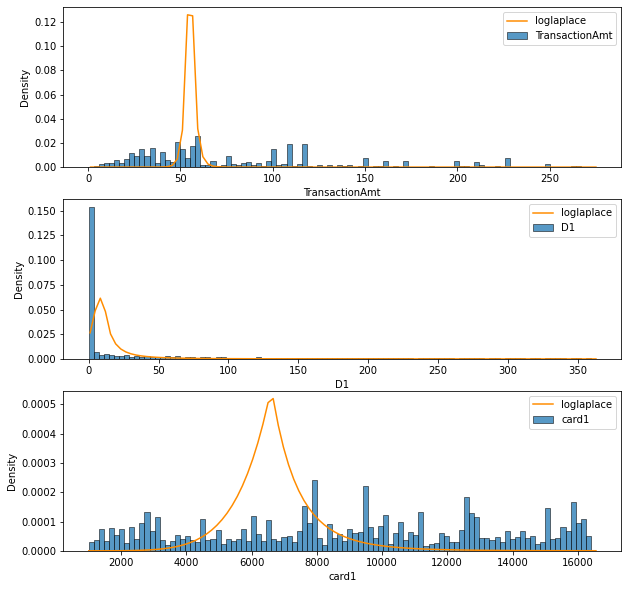

In [515]:
def func(x, a, b, c):
    return loglaplace.pdf(x, a, b, c)

NAME='loglaplace'

fig, axes = plt.subplots(3, figsize=(10, 10))
for idx, column in enumerate(subsample.columns):
    data = subsample[column]
    min_value, max_value = data.min(), data.max()
    date_entries, bins = np.histogram(data, bins=100)
    bins = bins[:100]
    sns.histplot(data, ax=axes[idx], stat='density', label=column, bins=bins)
    res = curve_fit(func, xdata=bins, ydata=date_entries, p0=[params[column][NAME]])
    print(res[0])
    xspace = np.linspace(min_value + 1, max_value, 100)
    sns.lineplot(xspace, func(xspace, *res[0]), color='darkorange', ax=axes[idx], label=NAME)

    axes[idx].legend()

fig.show()

### Step 6. Validate your estimated parameters using QQ biplots.

/Users/nduginets/.conda/envs/newexorders/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


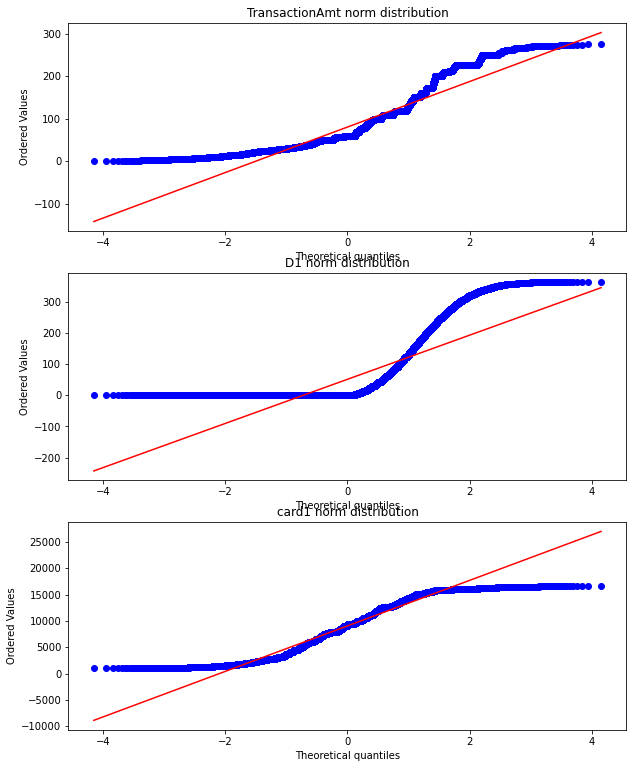

In [516]:
fig, axes = plt.subplots(3, figsize=(10, 13))
for idx, column in enumerate(subsample.columns):
    data = subsample[column]
    stats.probplot(data ,dist=stats.norm, plot=axes[idx])
    axes[idx].set_title(column + " norm distribution")
fig.show()

/Users/nduginets/.conda/envs/newexorders/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


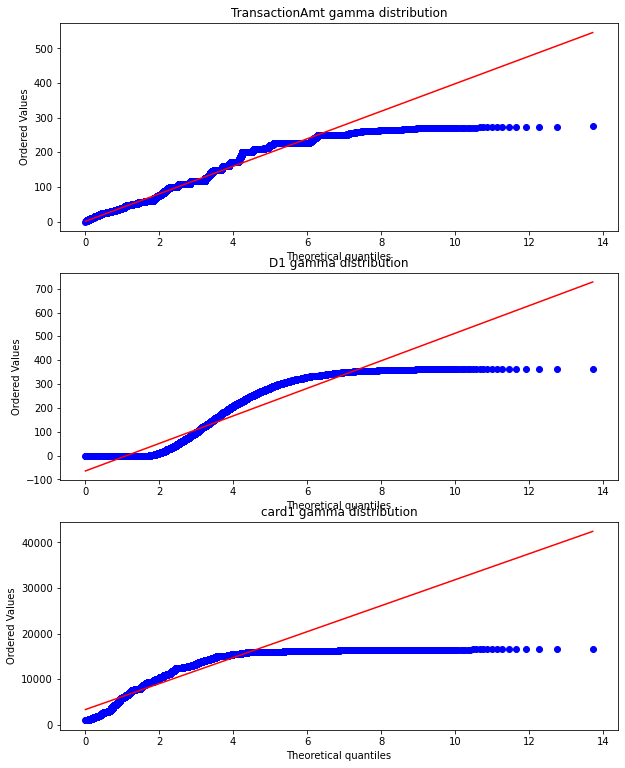

In [517]:
fig, axes = plt.subplots(3, figsize=(10, 13))
for idx, column in enumerate(subsample.columns):
    data = subsample[column]
    stats.probplot(data, sparams=(2), dist=stats.gamma, plot=axes[idx])
    axes[idx].set_title(column + " gamma distribution")
fig.show()

/Users/nduginets/.conda/envs/newexorders/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


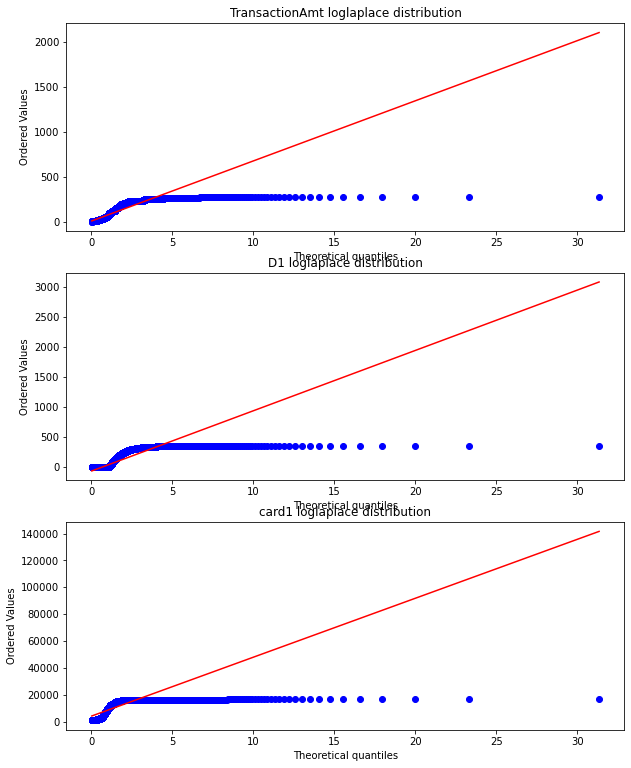

In [518]:
fig, axes = plt.subplots(3, figsize=(10, 13))
for idx, column in enumerate(subsample.columns):
    data = subsample[column]
    stats.probplot(data, sparams=(3), dist=stats.loglaplace, plot=axes[idx])
    axes[idx].set_title(column + " loglaplace distribution")
fig.show()

### Step 7. Estimate correctness of fitted distributions using at least 2 statistical tests.L

#### Shapiro-Wilk Test

In [519]:
from scipy.stats import shapiro

for idx, column in enumerate(subsample.columns):
    data = subsample[column]
    stat, p = shapiro(data)
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print('Probably {} Gaussian'.format(column))
    else:
        print('Probably {} not Gaussian'.format(column))

stat=0.880, p=0.000
Probably TransactionAmt not Gaussian
stat=0.649, p=0.000
Probably D1 not Gaussian
stat=0.958, p=0.000
Probably card1 not Gaussian


/Users/nduginets/.conda/envs/newexorders/lib/python3.7/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


#### Pearson’s Correlation Coefficient

In [520]:
from scipy.stats import pearsonr

for idx_i in range(len(subsample.columns)):
    for idx_j in range(idx_i + 1, len(subsample.columns)):
        name_i = subsample.columns[idx_i]
        name_j = subsample.columns[idx_j]

        data_i = subsample[name_i]
        data_j = subsample[name_j]
        stat, p = pearsonr(data_i, data_j)
        print('stat=%.3f, p=%.3f' % (stat, p))
        names = "{} & {}".format(name_i, name_j)
        if p > 0.05:
            print('Probably {} independent'.format(names))
        else:
            print('Probably {} dependent'.format(names))

stat=0.018, p=0.000
Probably TransactionAmt & D1 dependent
stat=-0.019, p=0.000
Probably TransactionAmt & card1 dependent
stat=-0.003, p=0.513
Probably D1 & card1 independent


Spearman’s Rank Correlation

In [521]:
from scipy.stats import spearmanr

for idx_i in range(len(subsample.columns)):
    for idx_j in range(idx_i + 1, len(subsample.columns)):
        name_i = subsample.columns[idx_i]
        name_j = subsample.columns[idx_j]

        data_i = subsample[name_i]
        data_j = subsample[name_j]
        stat, p = spearmanr(data_i, data_j)
        print('stat=%.3f, p=%.3f' % (stat, p))
        names = "{} & {}".format(name_i, name_j)
        if p > 0.05:
            print('Probably {} independent'.format(names))
        else:
            print('Probably {} dependent'.format(names))

stat=0.038, p=0.000
Probably TransactionAmt & D1 dependent
stat=-0.021, p=0.000
Probably TransactionAmt & card1 dependent
stat=0.000, p=0.922
Probably D1 & card1 independent
